In [1]:
# Question 5
# S[n+2]=2S[n+1]+2S[n]
# initial conditions S[0]=0, S[1]=1

# S[n] = 2S[n-1]+2S[n-2]  #recursive?

In [2]:
def S(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    return 2*S(n-1)+2*S(n-2)
        
    

In [3]:
print(S(4))



16


In [4]:
def compute_sequence(N):
    S = [0] * (N + 1)  # We'll compute up to S[N]
    S[1] = 1

    # Compute the sequence using the given difference equation
    for i in range(2, N + 1):
        S[i] = 2*S[i-1] + 2*S[i-2]

    return S


In [5]:
compute_sequence(4)

[0, 1, 2, 6, 16]

In [6]:
# Part c
def closed(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    
    D = (3)**0.5
    z1 = 1+D
    z2 = 1-D
    A = D/6
    B = -D/6
    return round(A*z1**n + B*z2**n)
    


In [7]:
closed(4)

16

In [8]:
def compute_sequence2(B):
    S = [0] * (B + 1)  # We'll compute up to S[N]
    S[1] = 1

    # Compute the sequence using the given difference equation
    for x in range(2, B + 1):
        D = (3)**0.5
        z1 = 1+D
        z2 = 1-D
        A = D/6
        B = -D/6
        S[x] = round(A*z1**x + B*z2**x)

    return S

In [9]:
compute_sequence2(4)

[0, 1, 2, 6, 16]

In [10]:
# Question 6 
# x[n+1]=1/2(x[n]+c/x[n])


In [11]:
# Q6 (b)
def babylonian_solv (c, tol):
    x_n = c if c!=0 else 1
    while True:
        x_n1 = 0.5*(x_n+c/x_n)  #recurrence relations
        if abs (x_n1**2 - c)< tol:  # test if it fills the conditions 
            break
        x_n1 = x_n
    return x_n1

In [12]:
#Q6 (c)
# perform unittest 
import unittest

In [13]:
class TestBabylonian_Solv(unittest.TestCase):
    def test_positive(self):
        self.assertAlmostEqual(babylonian_solv(9, 1e-10), 3)

    def test_small(self):
        self.assertEqual(babylonian_solv(0.002, 1e-10), 0.044)

    def test_big(self):
        self.assertAlmostEqual(babylonian_solv(19000000, 1e-10), 4358)


if __name__ == '__main__':
    unittest.main()


E
ERROR: /Users/niulurui/Library/Jupyter/runtime/kernel-8248f17d-ab11-47e2-9b3e-8ae89a8c4616 (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/Users/niulurui/Library/Jupyter/runtime/kernel-8248f17d-ab11-47e2-9b3e-8ae89a8c4616'

----------------------------------------------------------------------
Ran 1 test in 0.003s

FAILED (errors=1)


SystemExit: True

/Users/niulurui/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


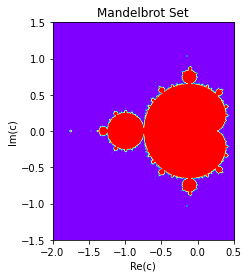

In [14]:
# Question 7 with help from ChatGPT
# Mandelbrot

import numpy as np
import matplotlib.pyplot as plt

def cmandelbrot(c):
    z = 0
    for n in range(100):
        z = z*z + c
        if abs(z) > 2: #threshold, tried 0, 1, 2, 3, 2 gives the best figure results
            return False
    return True

# Define the range for x and y
x_values = np.linspace(-2, 0.5, 500)
y_values = np.linspace(-1.5, 1.5, 500)
mandelbrot_set = np.zeros((len(y_values), len(x_values)))

# I didn't know how to do next and asked Chatgpt to work on this question
# Compute the Mandelbrot set

# x_values; y_values has index and integer; enumerate is able to add an counter
# BUT, why use complex function? 
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        c = complex(x, y)
        if cmandelbrot(c):
            mandelbrot_set[j, i] = 1

# Plot the Mandelbrot set
plt.imshow(mandelbrot_set, extent=[-2, 0.5, -1.5, 1.5], cmap='rainbow')
plt.xlabel('Re(c)')
plt.ylabel('Im(c)')
plt.title('Mandelbrot Set')
plt.show()



/var/folders/hg/40p4q8vn7d9g0mjyttz8nz980000gn/T/ipykernel_78162/483606568.py:17: RuntimeWarning: invalid value encountered in scalar power
  z[i] = z[i-1] - dt*((2*g*(z[i-1]-z[i]))**0.5)


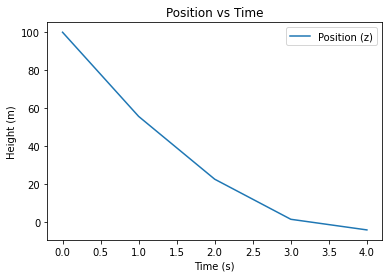

In [15]:
# Question 8
# Part 8a

g = 9.8   #gravity accerlation 
z0 = 100 #initial height (m): z(0)=z0=100m


t_max = 50  # assume spend 50 second to fall down 
dt = 1  # Time step (s)
time = np.arange(0, t_max, dt)

# Initialization
z = np.zeros(len(time))  # position array
z[0] = z0

for i in range (1, len(time)):
    z[i] = z[i-1] - dt*((2*g*(z[i-1]-z[i]))**0.5)

    
# Plot the position
plt.plot(time, z, label='Position (z)')
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Position vs Time')
plt.legend()


In [16]:
##Part 8b
# v[n+1]=v[n]-g*dt 
# z[n+1]=z[n]+v[i]*dt

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
h0 = 100  # Initial height (m)

# Time
t_max = 10  # Total time of the fall (s)
dt = 0.01  # Time step (s)
time = np.arange(0, t_max, dt)

# Initialization
v = np.zeros(len(time))  # Velocity array
h = np.zeros(len(time))  # Position array
h[0] = h0


# Euler method to solve the ODE
for n in range(1, len(time)):
    v[n] = v[n-1] - g * dt
    h[n] = h[n-1] + v[n] * dt
    if h[n]<=0:
        h[n]=0
        times = time[:i]
        break
print(times)



[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48]


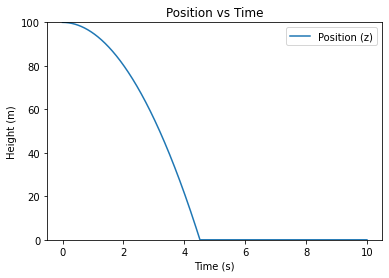

In [17]:
# Plot the position
plt.plot(time, h, label='Position (z)')
plt.ylim(0,100)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Position vs Time')
plt.legend()

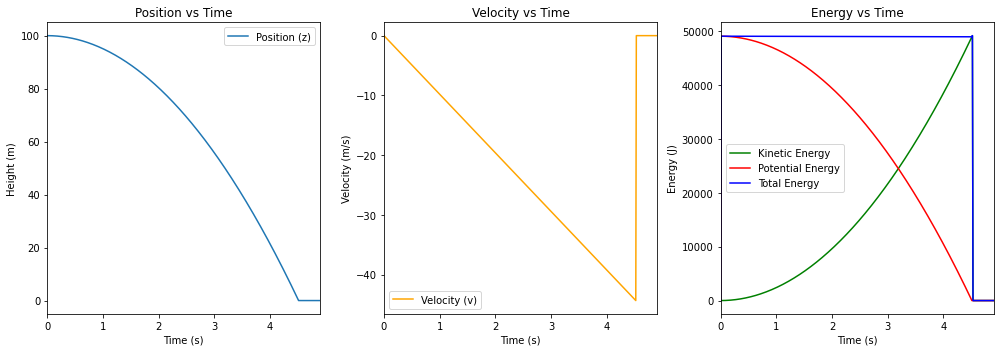

In [18]:
#
# Assume mass of coyote is 50 kg 
m = 50 # mass
E0 = m * g * z0  # Total energy at t=0, only potential energy
E_kinetic = np.zeros(len(time))  # Kinetic energy array
E_potential = np.zeros(len(time))  # Potential energy array
E_total = np.zeros(len(time))  # Total energy array

for i in range(1, len(time)):
    E_kinetic[i] = 0.5 * m * v[i]**2
    E_potential[i] = m * g * h[i]
    E_total[i] = E_kinetic[i] + E_potential[i]

# Plot the results
plt.figure(figsize=(14, 5))

# Plot the position
plt.subplot(1, 3, 1)
plt.plot(time, h, label='Position (z)')
plt.xlim(0,4.9)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Position vs Time')
plt.legend()

# Plot the velocity
plt.subplot(1, 3, 2)
plt.plot(time, v, label='Velocity (v)', color='orange')
plt.xlim(0,4.9)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs Time')
plt.legend()

# Plot the energy
plt.subplot(1, 3, 3)
plt.plot(time, E_kinetic, label='Kinetic Energy', color='green')
plt.plot(time, E_potential, label='Potential Energy', color='red')
plt.plot(time, E_total, label='Total Energy', color='blue')
plt.xlim(0,4.9)
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.title('Energy vs Time')
plt.legend()

plt.tight_layout()
plt.show()


In [23]:
# Part 8c
# leap-frog 


z0=100
m = 50 # mass
dt = 0.01  # time step 
total_time = 5  # total time 
tstep = int(total_time/dt)  # number of steps

# Initialization
t = np.linspace(-dt, total_time, n+1)  # time array
v = np.zeros(n+1)  # velocity array
z = np.zeros(n+1)  # height array
z[1] = z0  # initial height 
kinetic = np.zeros(tstep+1)  # Kinetic energy array
potential = np.zeros(tstep+1)  # Potential energy array
total = np.zeros(tstep+1)

# Leap-frog scheme
for y in range(1, tstep):
    v[y+1] = v[y-1] + 2 * dt * g  # update velocity
    z[y+1] = z[y] + 2 * dt * v[y]  # update position

z = z + z0

for p in range(1, tstep):
    kinetic[p] = 0.5 * m * v[p]**2
    potential[p] = m * g * h[p]
    total[p] = kinetic[p] + potential[p]
    



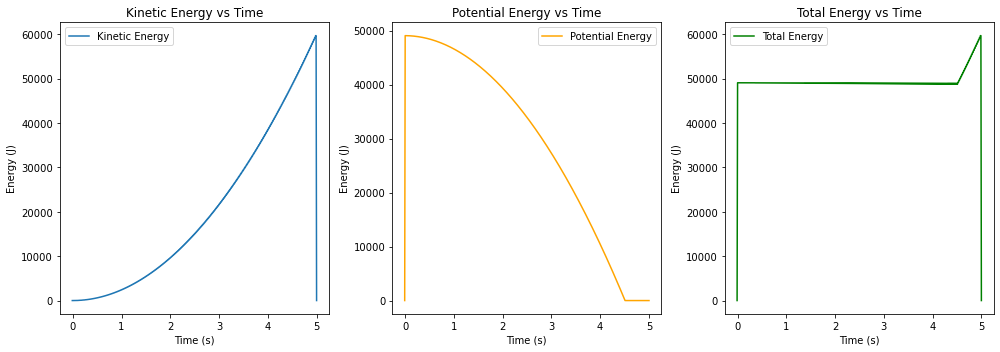

In [25]:
# Plotting
plt.figure(figsize=(14, 5))

# Kinetic Energy Plot
plt.subplot(1, 3, 1)
plt.plot(t, kinetic, label='Kinetic Energy')
plt.title('Kinetic Energy vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()

# Potential Energy Plot
plt.subplot(1, 3, 2)
plt.plot(t, potential, label='Potential Energy', color='orange')
plt.title('Potential Energy vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()

# Total Energy Plot
plt.subplot(1, 3, 3)
plt.plot(t, total, label='Total Energy', color='green')
plt.title('Total Energy vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.legend()

plt.tight_layout()
plt.show()
